In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
import warnings
from statistics import median


import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("2019_partnerships_ipl.csv")
df.head()


,index,team,player_1,player_2,score_1,score_2
0,0,Chennai Super Kings,AT Rayudu,SR Watson,7,0
1,1,Chennai Super Kings,AT Rayudu,SK Raina,12,19
2,2,Chennai Super Kings,AT Rayudu,KM Jadhav,9,9
3,3,Chennai Super Kings,RA Jadeja,KM Jadhav,6,4
4,19,Sunrisers Hyderabad,DA Warner,JM Bairstow,74,39


In [ ]:

df_dc = df[df['team']=="Delhi Capitals"]

df_dc['partners'] = [sorted([i,j]) for i,j in zip(df_dc['player_1'], df_dc['player_2'])]
df_dc['partnership'] = ["".join(i) for i in df_dc['partners']]

df_dc.head()

,index,team,player_1,player_2,score_1,score_2,partners,partnership
17,32,Delhi Capitals,S Dhawan,PP Shaw,2,7,"[PP Shaw, S Dhawan]",PP ShawS Dhawan
18,33,Delhi Capitals,S Dhawan,SS Iyer,2,16,"[S Dhawan, SS Iyer]",S DhawanSS Iyer
19,34,Delhi Capitals,S Dhawan,CA Ingram,36,47,"[CA Ingram, S Dhawan]",CA IngramS Dhawan
20,35,Delhi Capitals,S Dhawan,RR Pant,3,16,"[RR Pant, S Dhawan]",RR PantS Dhawan
21,36,Delhi Capitals,KMA Paul,RR Pant,3,21,"[KMA Paul, RR Pant]",KMA PaulRR Pant


In [ ]:

p1 = []
p2 = []


r1 = []
r2 = []

for p in df_dc['partnership'].unique():
    
    temp = df_dc[df_dc['partnership'] == p]
    p1.append(temp.iloc[0]['player_1'])
    p2.append(temp.iloc[0]['player_2'])
    
    a = []
    b = []
    

    for index, row in temp.iterrows():

        a.append(row['score_1'])
        
 
        b.append(row['score_2'])

       
    r1.append(median(a))
    r2.append(median(b))

In [ ]:

team_df = pd.DataFrame({'p1':p1, 'p2':p2, 'r1':r1, 'r2':r2})
team_df.head()


,p1,p2,r1,r2
0,S Dhawan,PP Shaw,13.0,11.0
1,S Dhawan,SS Iyer,21.5,23.0
2,S Dhawan,CA Ingram,4.0,14.0
3,S Dhawan,RR Pant,8.0,20.5
4,KMA Paul,RR Pant,3.0,13.0


In [ ]:

team_df['lead'] = np.where(team_df['r1'] >= team_df['r2'], team_df['p1'], team_df['p2'])
team_df['follower'] = np.where(team_df['lead'] == team_df['p1'], team_df['p2'], team_df['p1'])
team_df['larger_score'] = np.where(team_df['r1'] >= team_df['r2'], team_df['r1'], team_df['r2'])
team_df['total_score'] = team_df['r1'] + team_df['r2']

team_df['performance'] = team_df['larger_score']/(team_df['total_score']+0.01)

In [ ]:

G = nx.from_pandas_edgelist(team_df, "follower", "lead", ['performance'], create_using=nx.MultiDiGraph())


_, wt = zip(*nx.get_edge_attributes(G, 'performance').items())

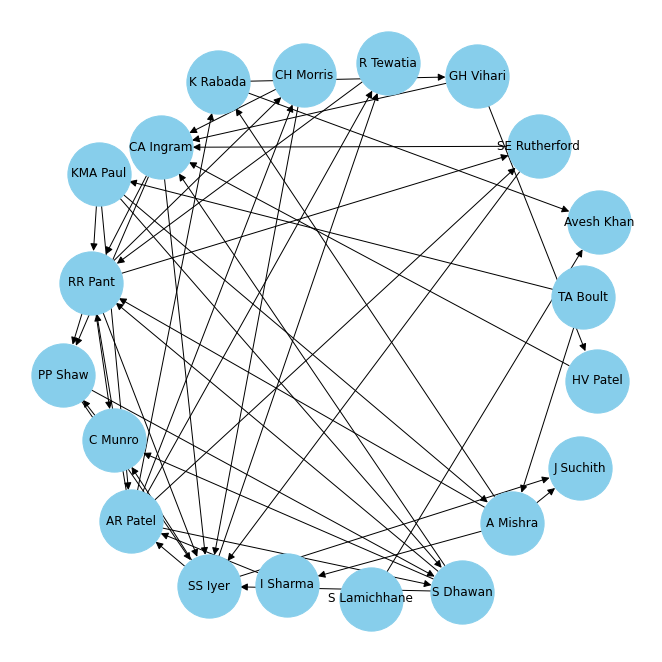

In [ ]:

plt.figure(figsize=(9,9))
pos = nx.spring_layout(G, k = 20, seed = 21) 
nx.draw(G, with_labels=True, node_color='skyblue', node_size=4000, pos = pos, edgelist=G.edges(), edge_color='black', arrowsize=15)
plt.show()

In [ ]:
sorted(G.degree, key=lambda x: x[1], reverse=True)


[('RR Pant', 11),
 ('SS Iyer', 10),
 ('AR Patel', 9),
 ('CA Ingram', 8),
 ('S Dhawan', 7),
 ('A Mishra', 6),
 ('PP Shaw', 5),
 ('KMA Paul', 5),
 ('CH Morris', 4),
 ('K Rabada', 4),
 ('C Munro', 4),
 ('SE Rutherford', 4),
 ('R Tewatia', 3),
 ('GH Vihari', 3),
 ('HV Patel', 2),
 ('Avesh Khan', 2),
 ('I Sharma', 2),
 ('J Suchith', 2),
 ('TA Boult', 2),
 ('S Lamichhane', 1)]

In [ ]:
sorted(G.in_degree, key=lambda x: x[1], reverse=True)


[('SS Iyer', 6),
 ('RR Pant', 6),
 ('CA Ingram', 5),
 ('PP Shaw', 3),
 ('S Dhawan', 3),
 ('AR Patel', 3),
 ('C Munro', 3),
 ('R Tewatia', 2),
 ('CH Morris', 2),
 ('K Rabada', 2),
 ('Avesh Khan', 2),
 ('A Mishra', 2),
 ('SE Rutherford', 2),
 ('J Suchith', 2),
 ('KMA Paul', 1),
 ('GH Vihari', 1),
 ('HV Patel', 1),
 ('I Sharma', 1),
 ('S Lamichhane', 0),
 ('TA Boult', 0)]

In [ ]:
sorted(G.out_degree, key=lambda x: x[1], reverse=True)


[('AR Patel', 6),
 ('RR Pant', 5),
 ('S Dhawan', 4),
 ('SS Iyer', 4),
 ('KMA Paul', 4),
 ('A Mishra', 4),
 ('CA Ingram', 3),
 ('PP Shaw', 2),
 ('GH Vihari', 2),
 ('CH Morris', 2),
 ('K Rabada', 2),
 ('SE Rutherford', 2),
 ('TA Boult', 2),
 ('R Tewatia', 1),
 ('HV Patel', 1),
 ('S Lamichhane', 1),
 ('I Sharma', 1),
 ('C Munro', 1),
 ('Avesh Khan', 0),
 ('J Suchith', 0)]